In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import pandas as pd

In [2]:
start = dt.datetime(2018,1,1)
end = dt.datetime.now()
asset = str(input('Look on Yahoo Finance for ticker.'
                  'Asset to backtest: '))
data = yf.download(asset, start=start, end=end)
data

Look on Yahoo Finance for ticker.Asset to backtest: tsla
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
...,...,...,...,...,...,...
2023-12-04,235.750000,239.369995,233.289993,235.580002,235.580002,104099800
2023-12-05,233.869995,246.660004,233.699997,238.720001,238.720001,137971100
2023-12-06,242.919998,246.570007,239.169998,239.369995,239.369995,126436200


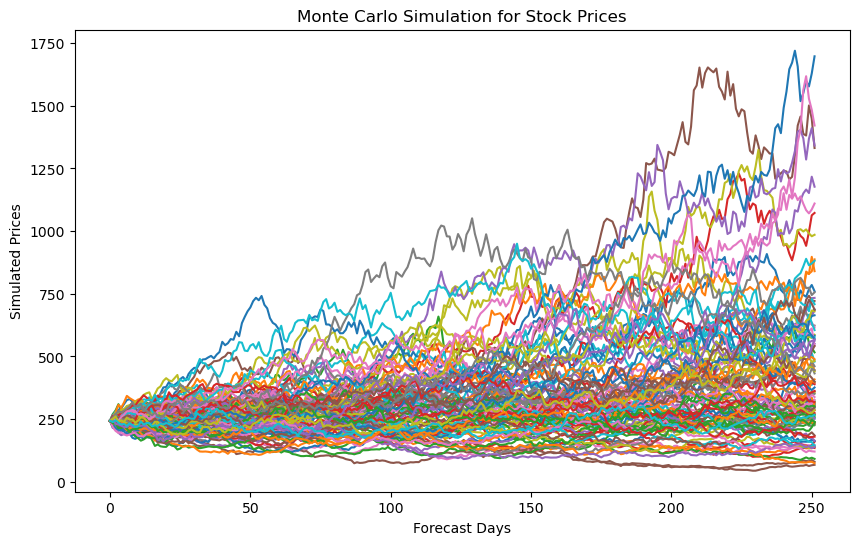

In [3]:
# Calculate mean and standard deviation of historical prices
mu = data.Close.pct_change().mean()
sigma = data.Close.pct_change().std()

# Set the number of simulations and forecast days
num_simulations = 100
forecast_days = 252  # 1 year of trading days

# Perform Monte Carlo simulation
simulations = np.zeros((forecast_days, num_simulations))
simulated_prices = np.zeros((forecast_days, num_simulations))

for i in range(num_simulations):
    price_path = np.zeros(forecast_days)
    price_path[0] = data.Close.iloc[-1]  # Set starting price as the last known price
    
    for j in range(1, forecast_days):
        daily_returns = np.random.normal(mu, sigma)
        price_path[j] = price_path[j - 1] * (1 + daily_returns)
        
    simulations[:, i] = price_path
    simulated_prices[:, i] = price_path

# Plotting the simulation results
plt.figure(figsize=(10, 6))
plt.plot(simulated_prices)
plt.title('Monte Carlo Simulation for Stock Prices')
plt.xlabel('Forecast Days')
plt.ylabel('Simulated Prices')
plt.show()

In [8]:
df_simulated_prices = pd.DataFrame(simulated_prices, columns=[f"Simulation_{i+1}" for i in range(num_simulations)])

df_ohlc = pd.DataFrame({
    'Open': df_simulated_prices.iloc[0],
    'High': df_simulated_prices.max(axis=0),
    'Low': df_simulated_prices.min(axis=0),
    'Close': df_simulated_prices.iloc[-1]
})
    

print(df_ohlc.head(5))

                    Open        High         Low       Close
Simulation_1  243.839996  423.931183  183.149811  311.520216
Simulation_2  243.839996  326.815964  172.572623  195.206587
Simulation_3  243.839996  772.794984  227.791608  743.711847
Simulation_4  243.839996  385.958486  161.517093  278.442423
Simulation_5  243.839996  252.600145   94.336788  212.489855
